# Test20190902

In [11]:
import numpy as np
import sympy as sm
from sympy import symbols, Function, dsolve, Eq
import matplotlib.pyplot as plt

%matplotlib

Using matplotlib backend: TkAgg


## 2019-09-02

In [12]:
X=np.matrix([
    [1, 2/1, 5/1, 3/1],
    [1/2, 1/1, 3/1, 1/2],
    [1/5, 1/3, 1/1, 1/4],
    [1/3, 2/1, 4/1, 1/1],
])

X1 = np.linalg.eig(X)

In [35]:
np.float(max(X1[0]))

c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


4.1383182902227205

In [26]:
def ahp(X: np.matrix) -> np.nan:
    pass

In [41]:
[D, V] = np.linalg.eig(X)
D.astype('float')

c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


array([ 4.13831829, -0.05264162, -0.05264162, -0.03303506])

In [42]:
D

array([ 4.13831829+0.j        , -0.05264162+0.75243334j,
       -0.05264162-0.75243334j, -0.03303506+0.j        ])

## 2019-09-03

In [3]:
t, beta, alpha = symbols('t beta alpha')
S = Function('S')
I = Function('I')
R = Function('R')

In [18]:
eq_lst = [
    Eq(S(t).diff(t), -beta*S(t)*I(t)),
    Eq(I(t).diff(t), beta*S(t)*I(t)-alpha*I(t)),
    Eq(R(t).diff(t), alpha*I(t))
]

In [1]:
# res = dsolve(eq_lst, S(t))

In [19]:
for i in eq_lst:
    sm.pretty_print(i)

d                      
──(S(t)) = -β⋅I(t)⋅S(t)
dt                     
d                               
──(I(t)) = -α⋅I(t) + β⋅I(t)⋅S(t)
dt                              
d                
──(R(t)) = α⋅I(t)
dt               


In [17]:
expr = t**3 + 2*t
sm.pretty_print(Eq(I(t).diff(t), beta*S(t)*I(t)-alpha*I(t)))


d                               
──(I(t)) = -α⋅I(t) + β⋅I(t)⋅S(t)
dt                              


In [18]:
dir(expr)

['__abs__',
 '__add__',
 '__class__',
 '__complex__',
 '__delattr__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__le__',
 '__long__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rdiv__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '_accept_eval_derivative',
 '_args',
 '_assumptions',
 '_combine_inverse',
 '_compare_pretty',
 '_constructor_postprocessor_mapping',
 '_diff_wrt',
 '_eval_adjoint',
 '_eval_as_leading_term',
 '_eval_conjugate',
 '_eval_derivative',
 '_e

In [2]:
y = Function('y')
x, w, H = symbols('x w H')

In [4]:
Eq = sm.Eq((w/H)*sm.sqrt(1+y(x).diff(x)), y(x).diff(x, 2))

In [5]:
Eq

Eq(w*sqrt(Derivative(y(x), x) + 1)/H, Derivative(y(x), (x, 2)))

In [7]:
f = dsolve(Eq, y(x))

In [8]:
f

Eq(y(x), C1 - C2*w*x**2/(4*H) + x*(C2**2/4 - 1) + w**2*x**3/(12*H**2))

In [23]:
t = np.linspace(0, 30, 300)

def plot_f(w0, H0):
    ff1 = f.args[1].subs([('C1', 0), ('C2', 2), (w, w0), (H, H0)])
    ff2 = f.args[1].subs([('C1', 0), ('C2', -2), (w, w0), (H, H0)])
    fff1 = sm.lambdify(x, ff1, 'numpy')
    fff2 = sm.lambdify(x, ff2, 'numpy')
    plt.plot(t, fff1(t), 'r')
    plt.plot(t, fff2(t), 'b')
    

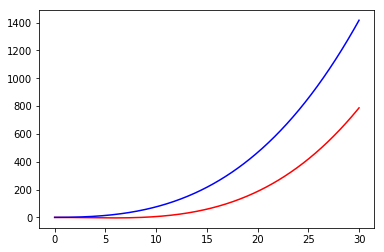

In [24]:
plot_f(7, 10)